In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import itertools
import operator
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist
from sklearn import metrics
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import laplacian_kernel
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import manifold
from sklearn.decomposition import PCA

from sklearn import svm

import dionysus as d
import sklearn_tda as tda
import umap

from biomarker.data_collection import *

Cython not found--WassersteinDistance not available
Gudhi not found--GraphInducedComplex not available
data_collection


In [2]:
EXCLUDE_KEYS = [206, 205, 184, 183, 82, 81, 45]#, 85, 135, 192]
TEST_KEYS = [217, 216]#, 215, 214, 213, 212, 211, 210, 209]

In [3]:
excel = parse_master_file(exclude_keys=EXCLUDE_KEYS).reset_index(drop=True)
keys = list(excel['Key'])
L = get_filename_list(excel['Associated data'])

[3, 9]


In [4]:
x10_x17 = excel.iloc[:, 3:-3]
x10_x17.head()

,X10: Category Method,X11: Temperature (K),X12: [Salt*Valency],X13: Category Salt type,X14: [Buffer] (mM),X15: pH,X16: CI #,X17: CI
0,A,298.0,0,0,0,7.00,0,N
1,B,298.0,0,0,50,4.74,0,N
2,A,298.0,0,0,0,7.00,1,CI_2
3,A,298.0,0,0,0,7.00,2,CI_1
4,A,298.0,0,0,0,7.00,2,CI_2


In [5]:
master, master_names = prepare_master(x10_x17)

In [6]:
def plot_embedding(X, y, title=None, annotate=True):
    cmap = cm.get_cmap('bwr')
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    y_min, y_max = np.min(y), np.max(y)
    norm = colors.Normalize(vmin=y_min, vmax=y_max)
    X = (X - x_min) / (x_max - x_min)
    
    if annotate:
        for i in range(X.shape[0]):
            plt.text(X[i, 0], X[i, 1], str(keys[i]), fontdict={'size': 7})
    sax = plt.scatter(X[:,0], X[:,1], c=y, vmin=y_min, vmax=y_max, cmap=cmap)

    cbar = plt.colorbar(sax, ticks=[0,2,4,6,8,10,12,14])
    cbar.ax.set_yticklabels(['0', '2', '4', '6', '8', '10', '12', '14']) 
    if title is not None:
        fig.title(title)



In [7]:
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
tsne = umap.UMAP(random_state=0, n_neighbors=20, min_dist=0.1, metric='correlation')

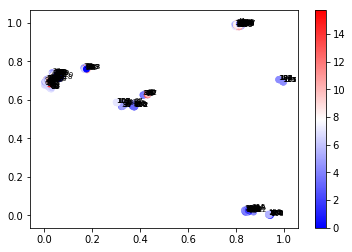

In [8]:
X_tsne = tsne.fit_transform(master)
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/no_kernel/x10-x17_annotated.png', dpi=400)

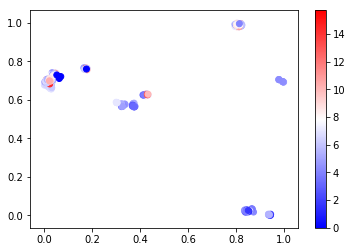

In [9]:
X_tsne = tsne.fit_transform(master)
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/no_kernel/x10-x17.png', dpi=400)

In [10]:
x1 = create_x1_matrix(L)

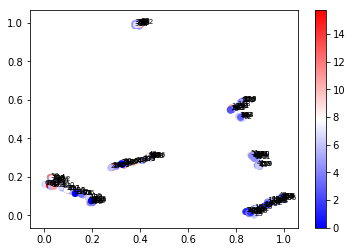

In [11]:
X_tsne = tsne.fit_transform(x1)
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/no_kernel/x1_annotated.png', dpi=400)

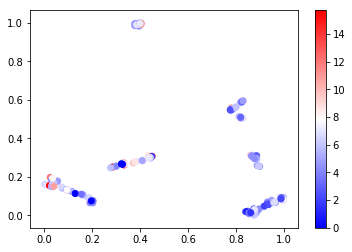

In [12]:
X_tsne = tsne.fit_transform(x1)
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/no_kernel/x1.png', dpi=400)

In [13]:
x3 = create_x3_matrix(L)

50 50


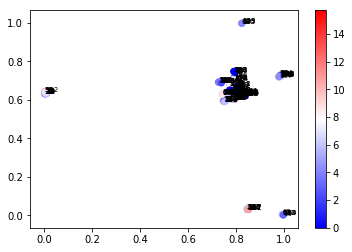

In [14]:
X_tsne = tsne.fit_transform(x3)
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/no_kernel/x3_annotated.png', dpi=400)

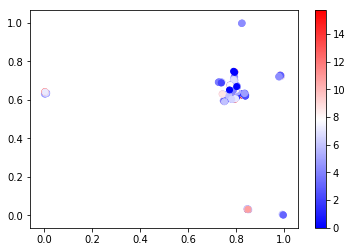

In [15]:
X_tsne = tsne.fit_transform(x3)
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/no_kernel/x3.png', dpi=400)

In [16]:
x4 = create_x4_matrix(L)

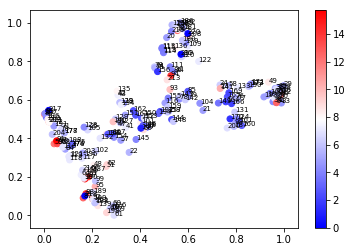

In [17]:
X_tsne = tsne.fit_transform(x4)
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/no_kernel/x4_annotated.png', dpi=400)

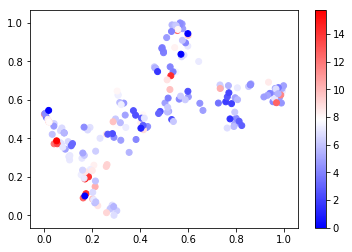

In [18]:
X_tsne = tsne.fit_transform(x4)
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/no_kernel/x4.png', dpi=400)

In [19]:
x5 = create_x5_matrix(L)

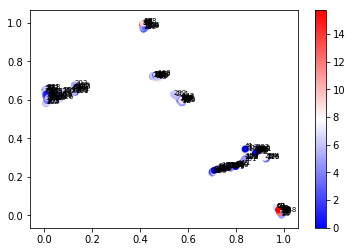

In [20]:
X_tsne = tsne.fit_transform(x5)
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/no_kernel/x5_annotated.png', dpi=400)

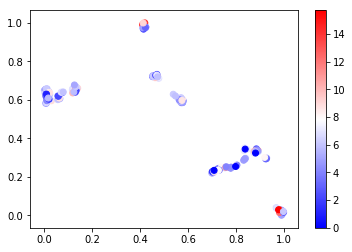

In [21]:
X_tsne = tsne.fit_transform(x5)
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/no_kernel/x5.png', dpi=400)

In [22]:
x6 = create_x6_matrix(L)

50 6


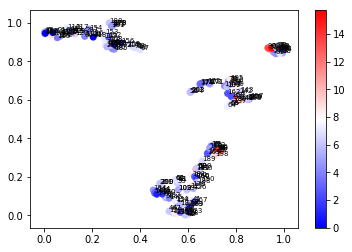

In [23]:
X_tsne = tsne.fit_transform(x6)
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/no_kernel/x6_annotated.png', dpi=400)

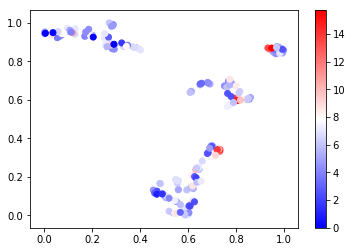

In [24]:
X_tsne = tsne.fit_transform(x6)
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/no_kernel/x6.png', dpi=400)

In [25]:
x7 = create_x7_matrix(L)

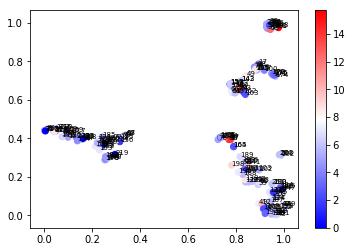

In [26]:
X_tsne = tsne.fit_transform(x7)
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/no_kernel/x7_annotated.png', dpi=400)

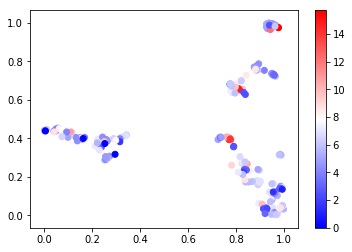

In [27]:
X_tsne = tsne.fit_transform(x7)
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/no_kernel/x7.png', dpi=400)

In [28]:
def compute_diagram(points, k=3):
    r = np.max(pdist(points, 'euclidean'))
    f = d.fill_rips(points, k, r)
    m = d.homology_persistence(f)
    return d.init_diagrams(m, f)

def get_max_diag_dim(dgms, h=1):
    m = 0
    for d in dgms:
        n = len(d[h])
        if n > m:
            m = n
    return m


def create_train_test_matrices(train_keys, test_keys):
    excel = parse_master_file(exclude_keys=EXCLUDE_KEYS)
    test_idxs = list(excel[np.isin(excel['Key'], test_keys)].index)
    excel_test = excel.iloc[test_idxs]
    L_test = get_filename_list(excel_test['Associated data'])
    y_test = excel_test['Output: logK'].values
    y_buck_test = excel_test['Output: logKbucket'].values
    
    excel_train = excel.drop(test_idxs, axis=0)
    L_train = get_filename_list(excel_train['Associated data'])
    y_train = excel_train['Output: logK'].values
    y_buck_train = excel_train['Output: logKbucket'].values
    
    x4_train, x4_dims = create_x4_matrix(L_train, return_dims=True)
    x4_train, x4_dims = create_x4_matrix(L_train, return_dims=True)
    x5_train, x5_dims = create_x5_matrix(L_train, return_dims=True)
    x6_train, x6_dims = create_x6_matrix(L_train, return_dims=True)
    x7_train, x7_dims = create_x7_matrix(L_train, return_dims=True)
    
    x4_test = create_x4_matrix(L_test, max_dims=x4_dims)
    x4_test = create_x4_matrix(L_test, max_dims=x4_dims)
    x5_test = create_x5_matrix(L_test, max_dims=x5_dims)
    x6_test = create_x6_matrix(L_test, max_dims=x6_dims)
    x7_test = create_x7_matrix(L_test, max_dims=x7_dims)
    
    x40_x47_train = excel_train.iloc[:, 3:-2]
    master_train, master_names = prepare_master(x40_x47_train)
    
    x40_x47_test = excel_test.iloc[:, 3:-2]
    master_test, master_names = prepare_master(x40_x47_test)
    
    X_train = np.hstack((x4_train,x4_train,x5_train,x6_train,x7_train))
    X_test = np.hstack((x4_test, x4_test, x5_test, x6_test, x7_test))
    
    X = np.vstack((X_train,X_test))
    K = rbf_kernel(X)
    X_train = K[:len(y_train), :len(y_train)]
    X_test = K[len(y_train):, :len(y_train)]
    
    return (X_train, y_train), (X_test, y_test)

def create_train_test_diagram_kernels_x4(train_keys, test_keys, h=1):
    excel = parse_master_file(exclude_keys=EXCLUDE_KEYS)
    test_idxs = list(excel[np.isin(excel['Key'], test_keys)].index)
    excel_test = excel.iloc[test_idxs]
    L_test = get_filename_list(excel_test['Associated data'])
    y_test = excel_test['Output: logK'].values
    y_buck_test = excel_test['Output: logKbucket'].values
    
    excel_train = excel.drop(test_idxs, axis=0)
    L_train = get_filename_list(excel_train['Associated data'])
    y_train = excel_train['Output: logK'].values
    y_buck_train = excel_train['Output: logKbucket'].values
    
    print('Computing Training Diagrams')
    diags_train = []
    for l in L_train:
        diags_train.append(compute_diagram(parse_x4(l)[['Val1', 'Val2', 'Val3']].values))
    for i in range(len(diags_train)):
        if len(diags_train[i][h]) == 0:
            diags_train[i] = np.array([[0,0]])
        else:
            diags_train[i] = np.array([[pt.birth,pt.death] for pt in diags_train[i][h]])
    
    print('Computing Test Diagrams')
    diags_test = []
    for l in L_test:
        diags_test.append(compute_diagram(parse_x4(l)[['Val1', 'Val2', 'Val3']].values))
    for i in range(len(diags_test)):
        if len(diags_test[i][h]) == 0:
            diags_test[i] = np.array([[0,0]])
        else:
            diags_test[i] = np.array([[pt.birth,pt.death] for pt in diags_test[i][h]])
    
    print('Computing Kernel')
    
    dd = diags_train + diags_test
    SW = tda.SlicedWassersteinKernel(num_directions=1, bandwidth=1.)
    
    D = SW.fit_transform(dd)
    
    D_train = D[:len(y_train), :len(y_train)]
    D_test = D[len(y_train):, :len(y_train)]
    return (D_train, y_train), (D_test, y_test)
      
    
def create_test_diagram_kernels(h=1, num_directions=1, bandwidth=1.0, x_type='x1', exclude_keys=EXCLUDE_KEYS):
    excel = parse_master_file(exclude_keys=exclude_keys)
    excel_test = excel
    L_test = get_filename_list(excel_test['Associated data'])
    y_test = excel_test['Output: logK'].values
    y_buck_test = excel_test['Output: logKbucket'].values
    
    print('Computing Test Diagrams')
    diags_test = []
    if x_type == 'x1':
        for l in L_test:
                diags_test.append(compute_diagram(parse_x1(l)[['X', 'Y', 'Z']].values))
    if x_type == 'x4':
        for l in L_test:
            diags_test.append(compute_diagram(parse_x4(l)[['Val1', 'Val2', 'Val3']].values))
    if x_type == 'x5':
        for l in L_test:
            diags_test.append(compute_diagram(parse_x5(l)[['X', 'Y', 'Z']].values))
    for i in range(len(diags_test)):
        if len(diags_test[i][h]) == 0:
            diags_test[i] = np.array([[0,0]])
        else:
            diags_test[i] = np.array([[pt.birth,pt.death] for pt in diags_test[i][h]])
    
    print('Computing Kernel')
    
    dd = diags_test
    SW = tda.SlicedWassersteinKernel(num_directions=num_directions, bandwidth=bandwidth)
    
    D = SW.fit_transform(dd)
    
    return (D, y_test)

def get_diag(k, h=1): 
    excel = parse_master_file(exclude_keys=EXCLUDE_KEYS)
    l = get_filename_list(excel[excel['Key'] == k]['Associated data'])[0]
    dgm = compute_diagram(parse_x4(l)[['Val1', 'Val2', 'Val3']].values)
    return dgm

def remove_for_loo(D, i, kernel=True):
    if kernel:
        D_train = np.delete(np.delete(D, i, axis=0), i, axis=1)
        D_test = np.delete(D[i], i, axis=0).reshape(1,-1)
    else:
        D_train = np.delete(D,i,axis=0)
        D_test = D[i].reshape(1,-1)
    return D_train, D_test

def create_classes(y, lims):
    classes = []
    for s in y:
        if s <= lims[0]:
            classes.append(0)
        elif s > lims[-1]:
            classes.append(len(lims)+1)
        else:
            for i in range(len(lims)-1):
                if s > lims[i] and s <= lims[i+1]:
                    classes.append(i+1)
                    break
    return pd.DataFrame(classes)

def create_class_boundaries(df, lims):
    predicted_classes = []
    actual_classes = []
    for idx, row in df.iterrows():
        if row['actual'] <= lims[0]:
            actual_classes.append(0)
        elif row['actual'] > lims[-1]:
            actual_classes.append(len(lims)+1)
        else:
            for i in range(len(lims)-1):
                if row['actual'] > lims[i] and row['actual'] <= lims[i+1]:
                    actual_classes.append(i+1)
                    break
    for idx, row in df.iterrows():
        if row['predicted'] <= lims[0]:
            predicted_classes.append(0)
        elif row['predicted'] > lims[-1]:
            predicted_classes.append(len(lims)+1)
        else:
            for i in range(len(lims)-1):
                if row['predicted'] > lims[i] and row['predicted'] <= lims[i+1]:
                    predicted_classes.append(i+1)
                    break
 

    print(len(actual_classes), len(predicted_classes))
    return pd.DataFrame({'actual_class': actual_classes, 'predicted_class': predicted_classes})


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i in range(cm.shape[0]):
#         for j in range(cm.shape[1]):
#             ax.text(j, i, format(cm[i, j], fmt),
#                     ha="center", va="center",
#                     color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
   

In [29]:
train_set_x1 = create_test_diagram_kernels(num_directions=1, bandwidth=2., h=1, x_type='x1')
train_set_x4 = create_test_diagram_kernels(num_directions=1, bandwidth=2., h=1, x_type='x4')
train_set_x5 = create_test_diagram_kernels(num_directions=1, bandwidth=2., h=1, x_type='x5')
X1 = train_set_x1[0]
X4 = train_set_x4[0]
X5 = train_set_x5[0]

D_test_x1 = np.delete(X1[191:193], [191,192], axis=1)
D_test_x4 = np.delete(X4[191:193], [191,192], axis=1)
D_test_x5 = np.delete(X5[191:193], [191,192], axis=1)

D_train_x1 = np.delete(np.delete(X1, [191,192], axis=0), [191,192], axis=1)
D_train_x4 = np.delete(np.delete(X4, [191,192], axis=0), [191,192], axis=1)
D_train_x5 = np.delete(np.delete(X5, [191,192], axis=0), [191,192], axis=1)

y = train_set_x1[1]
y_test = y[191:193]
y_train = np.delete(y, [191,192], axis=0)
        
K = master
K = rbf_kernel(K, gamma=0.0001)
K_test = np.delete(K[191:193], [191,192], axis=1)
K_train = np.delete(np.delete(K, [191,192], axis=0), [191,192], axis=1)

X3 = create_x3_matrix(L)
X3 = laplacian_kernel(X3, gamma=0.0001)
D_test_x3 = np.delete(X3[191:193], [191,192], axis=1)
D_train_x3 = np.delete(np.delete(X3, [191,192], axis=0), [191,192], axis=1)

X5b = create_x5_matrix(L)[:,0].reshape(-1,1)
X5b = rbf_kernel(X5b, gamma=0.0001)
D_test_x5b = np.delete(X5b[191:193], [191,192], axis=1)
D_train_x5b = np.delete(np.delete(X5b, [191,192], axis=0), [191,192], axis=1)

X6 = create_x6_matrix(L, max_dims=(50, 6))
X6 = laplacian_kernel(X6, gamma=0.0001)
D_test_x6 = np.delete(X6[191:193], [191,192], axis=1)
D_train_x6 = np.delete(np.delete(X6, [191,192], axis=0), [191,192], axis=1)

X7 = create_x7_matrix(L)
X7 = rbf_kernel(X7, gamma=0.0001)
D_test_x7 = np.delete(X7[191:193], [191,192], axis=1)
D_train_x7 = np.delete(np.delete(X7, [191,192], axis=0), [191,192], axis=1)    

[3, 9]
Computing Test Diagrams
Computing Kernel
[3, 9]
Computing Test Diagrams
Computing Kernel
[3, 9]
Computing Test Diagrams
Computing Kernel
50 50


In [30]:
alls = [X1, X3, X4, X5, X5b, X6, X7, K]

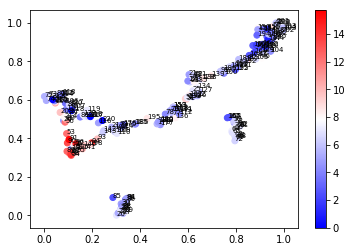

In [31]:
X_tsne = tsne.fit_transform(sum(alls))
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/kernel/all_annotated.png', dpi=400)

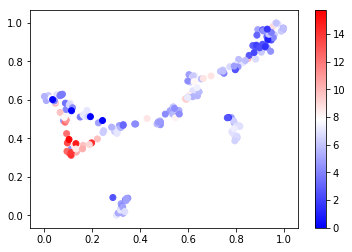

In [32]:
X_tsne = tsne.fit_transform(sum(alls))
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/kernel/all.png', dpi=400)

/Users/tgebhart/.virtualenvs/biomarker/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


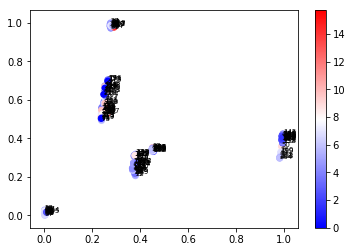

In [33]:
X_tsne = tsne.fit_transform(X1)
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/kernel/x1_annotated.png', dpi=400)

/Users/tgebhart/.virtualenvs/biomarker/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


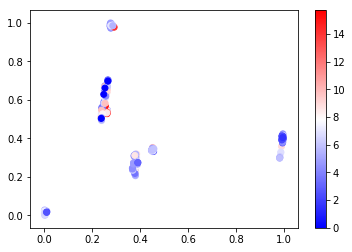

In [34]:
X_tsne = tsne.fit_transform(X1)
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/kernel/x1.png', dpi=400)

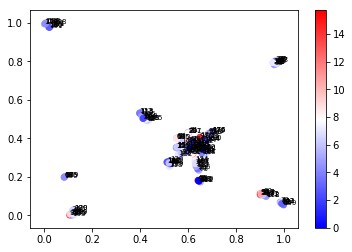

In [35]:
X_tsne = tsne.fit_transform(X3)
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/kernel/x3_annotated.png', dpi=400)

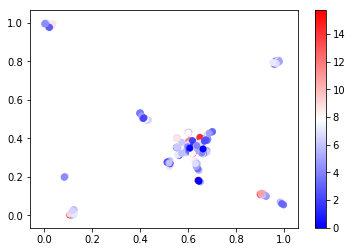

In [36]:
X_tsne = tsne.fit_transform(X3)
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/kernel/x3.png', dpi=400)

/Users/tgebhart/.virtualenvs/biomarker/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


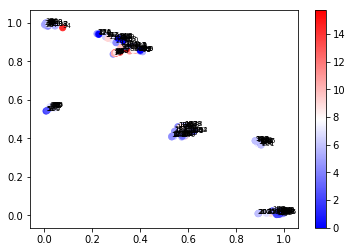

In [37]:
X_tsne = tsne.fit_transform(X4)
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/kernel/x4_annotated.png', dpi=400)

/Users/tgebhart/.virtualenvs/biomarker/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


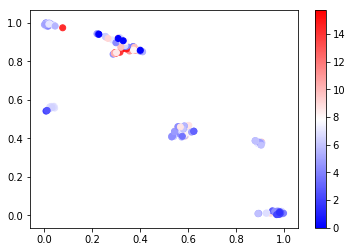

In [38]:
X_tsne = tsne.fit_transform(X4)
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/kernel/x4.png', dpi=400)

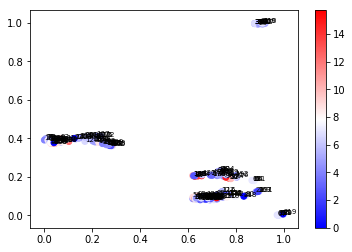

In [39]:
X_tsne = tsne.fit_transform(X5)
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/kernel/x5_annotated.png', dpi=400)

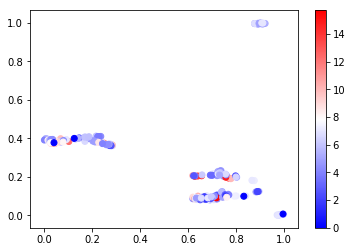

In [40]:
X_tsne = tsne.fit_transform(X5)
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/kernel/x5.png', dpi=400)

/Users/tgebhart/.virtualenvs/biomarker/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


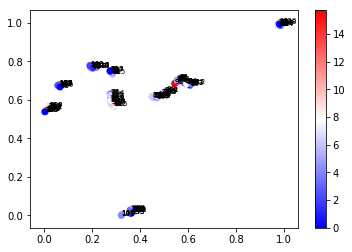

In [41]:
X_tsne = tsne.fit_transform(X5b)
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/kernel/x5b_annotated.png', dpi=400)

/Users/tgebhart/.virtualenvs/biomarker/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


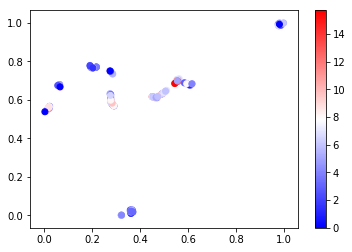

In [42]:
X_tsne = tsne.fit_transform(X5b)
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/kernel/x5b.png', dpi=400)

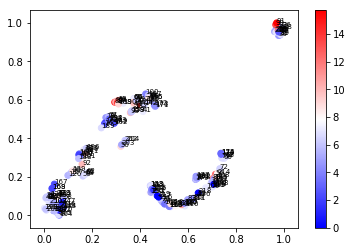

In [43]:
X_tsne = tsne.fit_transform(X6)
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/kernel/x6_annotated.png', dpi=400)

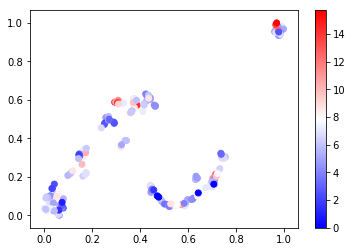

In [44]:
X_tsne = tsne.fit_transform(X6)
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/kernel/x6.png', dpi=400)

/Users/tgebhart/.virtualenvs/biomarker/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


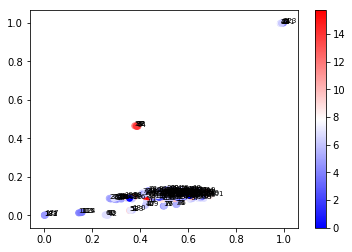

In [45]:
X_tsne = tsne.fit_transform(X7)
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/kernel/x7_annotated.png', dpi=400)

/Users/tgebhart/.virtualenvs/biomarker/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


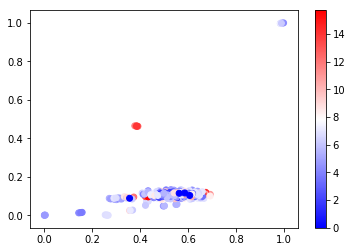

In [46]:
X_tsne = tsne.fit_transform(X7)
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/kernel/x7.png', dpi=400)

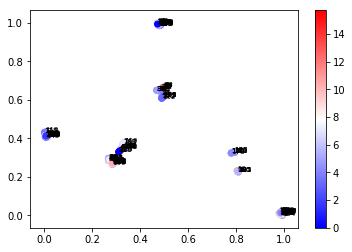

In [47]:
X_tsne = tsne.fit_transform(K)
plot_embedding(X_tsne, excel['Output: logK'], annotate=True)
plt.savefig('../data/results/both/scatter/kernel/x10-x17_annotated.png', dpi=400)

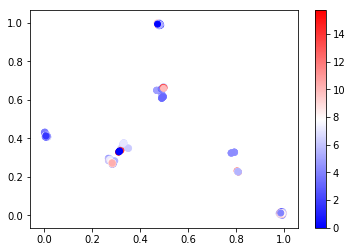

In [48]:
X_tsne = tsne.fit_transform(K)
plot_embedding(X_tsne, excel['Output: logK'], annotate=False)
plt.savefig('../data/results/both/scatter/kernel/x10-x17.png', dpi=400)